   ul_total_num_pkts  ul_total_num_bytes  ul_min_pkt_size  ul_max_pkt_size  \
0                  1                76.0             76.0             76.0   
1                  1                62.0             62.0             62.0   
2                  2               127.0             52.0             75.0   
3                  2               135.0             52.0             83.0   
4                 15              2293.0             52.0           1290.0   

   ul_mean_pkt_size  ul_std_pkt_size  ul_min_iat  ul_max_iat  ul_mean_iat  \
0         76.000000       205.286998    0.807287    9.686940     1.488578   
1         62.000000       205.286998    0.807287    9.686940     1.488578   
2         63.500000        16.263456    0.007902    0.007902     0.007902   
3         67.500000        21.920310    0.059009    0.059009     0.059009   
4        152.866667       319.976085    0.000153    0.325016     0.027096   

   ul_std_iat  ...  dl_min_iat  dl_max_iat  dl_mean_iat  dl_std_iat 

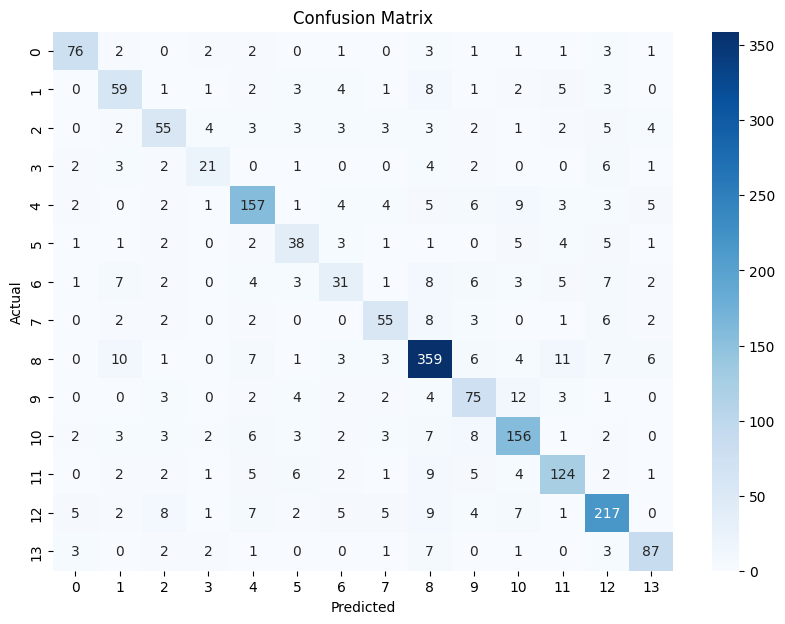

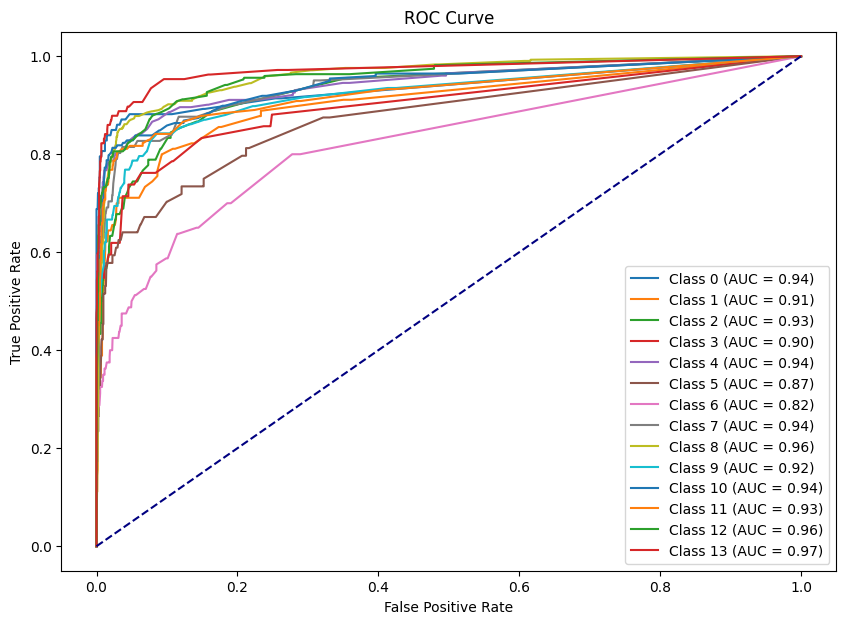

In [4]:
#Simple random forest on preprocessed_random
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Processed_random.csv')

if 'Unnamed: 0' in data.columns:
    data = data.drop('Unnamed: 0', axis=1)

# Separate features and target
data=data.drop('action',axis=1)
X = data.drop(columns=['app'])
y = data['app']

print(X.head())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)  # Use this for ROC curve

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve (only for binary classification or using One-vs-Rest for multi-class)
plt.figure(figsize=(10, 7))
for i, class_label in enumerate(rf_model.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.7780711017247448
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       418
           1       0.76      0.72      0.74       426
           2       0.69      0.73      0.71       389
           3       0.78      0.88      0.83       432
           4       0.82      0.77      0.80       394
           5       0.72      0.77      0.74       404
           6       0.65      0.75      0.70       407
           7       0.83      0.84      0.84       412
           8       0.83      0.83      0.83       415
           9       0.74      0.75      0.74       384
          10       0.75      0.69      0.71       376
          11       0.85      0.78      0.81       423
          12       0.83      0.74      0.79       415
          13       0.81      0.79      0.80       387

    accuracy                           0.78      5682
   macro avg       0.78      0.78      0.78      5682
weighted avg       0.78     

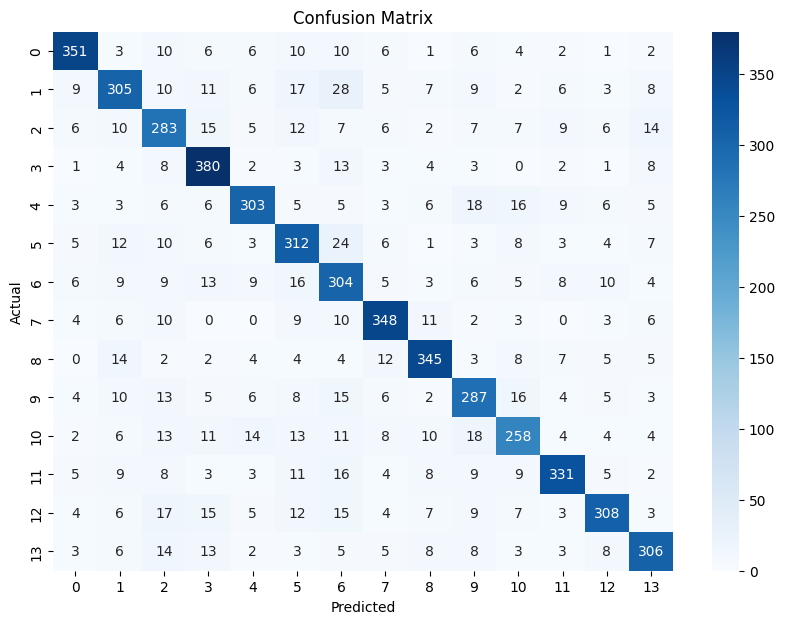

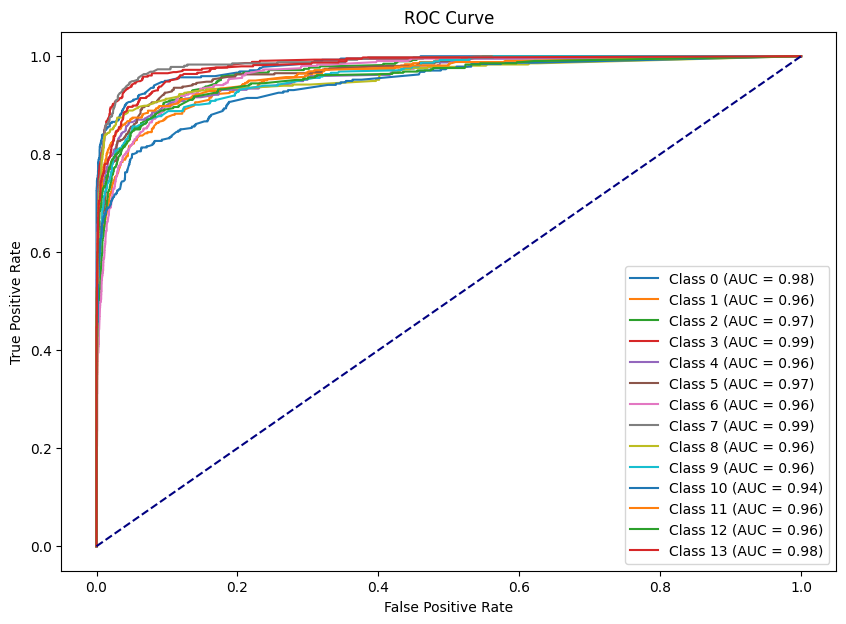

In [3]:
#Simple random forest on balanced_random_smote
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('balanced_random_smote.csv')

if 'Unnamed: 0' in data.columns:
    data = data.drop('Unnamed: 0', axis=1)

# Separate features and target
data=data.drop('action',axis=1)
X = data.drop(columns=['app'])
y = data['app']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)  # Use this for ROC curve

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve (only for binary classification or using One-vs-Rest for multi-class)
plt.figure(figsize=(10, 7))
for i, class_label in enumerate(rf_model.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


Accuracy: 0.8847517730496454
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        64
           1       0.77      0.62      0.69        16
           2       0.79      0.79      0.79        28
           3       0.82      0.76      0.78        41
           4       0.92      0.89      0.91       140
           5       0.67      0.62      0.64        13
           6       0.80      1.00      0.89        12
           7       0.93      0.90      0.92        31
           8       0.90      0.93      0.92       300
           9       0.71      0.67      0.69        43
          10       0.86      0.84      0.85       120
          11       0.89      0.94      0.92        81
          12       0.89      0.89      0.89       187
          13       0.95      1.00      0.97        52

    accuracy                           0.88      1128
   macro avg       0.85      0.84      0.84      1128
weighted avg       0.88     

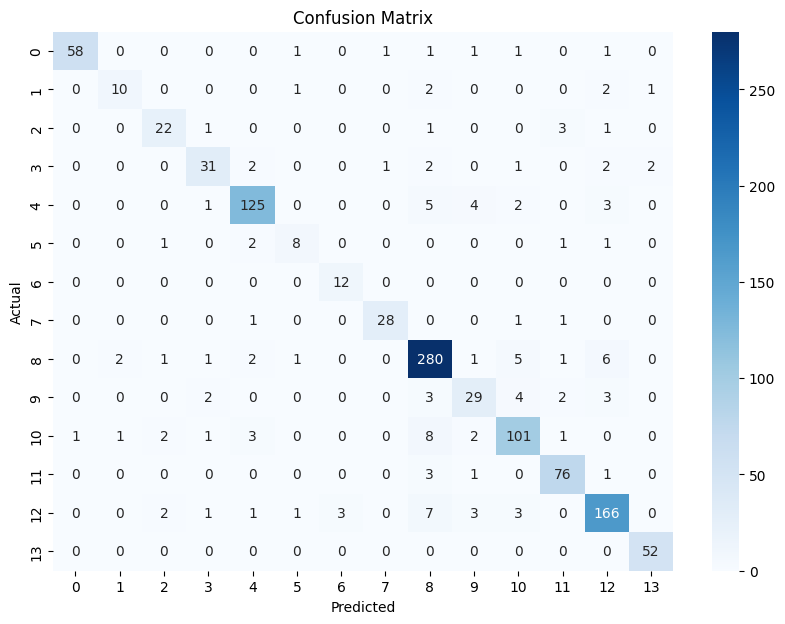

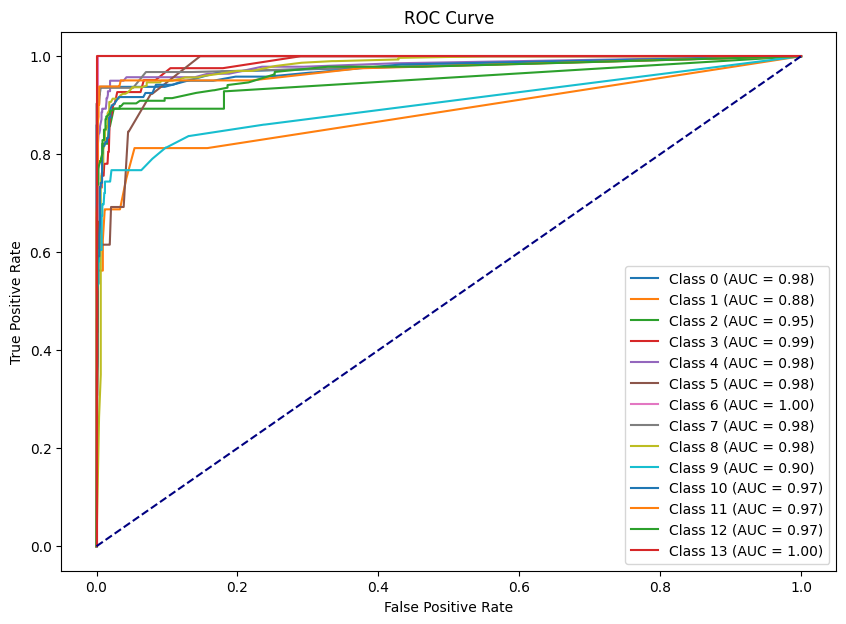

In [1]:
#Simple random forest on balanced_random_enn
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('balanced_random_enn.csv')

if 'Unnamed: 0' in data.columns:
    data = data.drop('Unnamed: 0', axis=1)

# Separate features and target
data=data.drop('action',axis=1)
X = data.drop(columns=['app'])
y = data['app']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)  # Use this for ROC curve

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve (only for binary classification or using One-vs-Rest for multi-class)
plt.figure(figsize=(10, 7))
for i, class_label in enumerate(rf_model.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


Accuracy: 0.8238422335475294
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       326
           1       0.76      0.76      0.76       285
           2       0.81      0.80      0.81       350
           3       0.85      0.92      0.88       328
           4       0.86      0.80      0.83       301
           5       0.77      0.80      0.78       328
           6       0.72      0.78      0.75       313
           7       0.89      0.86      0.88       324
           8       0.92      0.88      0.90       317
           9       0.78      0.78      0.78       336
          10       0.74      0.76      0.75       284
          11       0.86      0.83      0.84       344
          12       0.87      0.81      0.84       329
          13       0.81      0.84      0.83       348

    accuracy                           0.82      4513
   macro avg       0.82      0.82      0.82      4513
weighted avg       0.83     

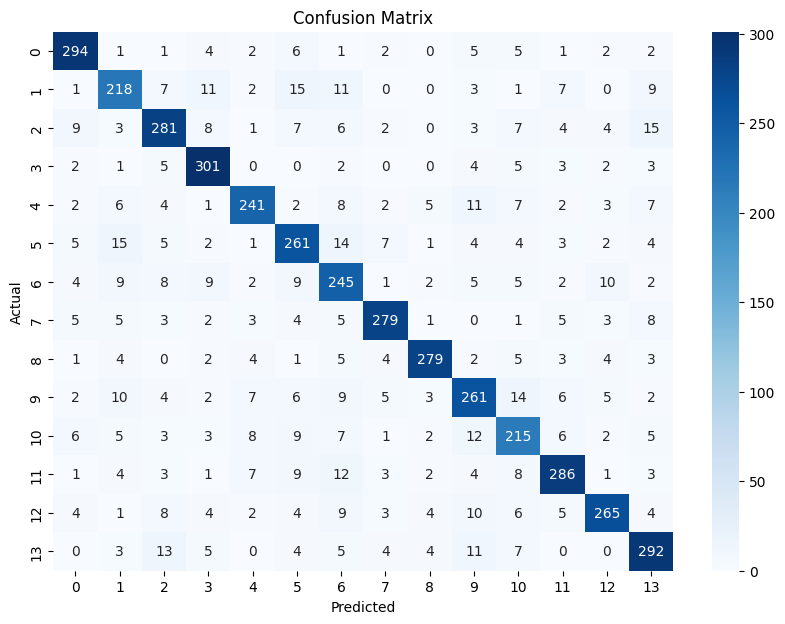

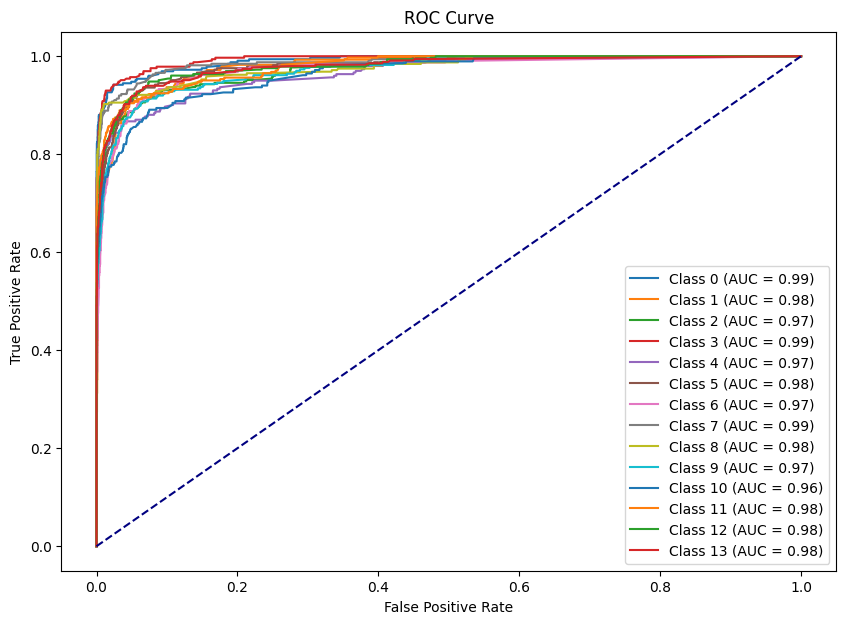

In [5]:
#Simple random forest on balanced_random_smoteenn
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('balanced_random_smoteenn.csv')

if 'Unnamed: 0' in data.columns:
    data = data.drop('Unnamed: 0', axis=1)
    
# Separate features and target
data=data.drop('action',axis=1)
X = data.drop(columns=['app'])
y = data['app']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)  # Use this for ROC curve

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve (only for binary classification or using One-vs-Rest for multi-class)
plt.figure(figsize=(10, 7))
for i, class_label in enumerate(rf_model.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


Accuracy: 0.18398576512455517
Classification Report:
              precision    recall  f1-score   support

           0       0.03      0.07      0.04        58
           1       0.10      0.10      0.10        72
           2       0.28      0.34      0.31        77
           3       0.10      0.08      0.09       214
           4       0.79      0.02      0.05       896
           5       0.30      0.24      0.27       180
           6       0.17      0.03      0.06        88
           7       0.13      0.58      0.22       244
           8       0.40      0.23      0.29       518
           9       0.12      0.13      0.13        62
          10       0.40      0.06      0.10        72
          11       0.19      0.56      0.28       171
          12       0.16      0.17      0.16        72
          13       0.11      0.15      0.12        86

    accuracy                           0.18      2810
   macro avg       0.23      0.20      0.16      2810
weighted avg       0.41    

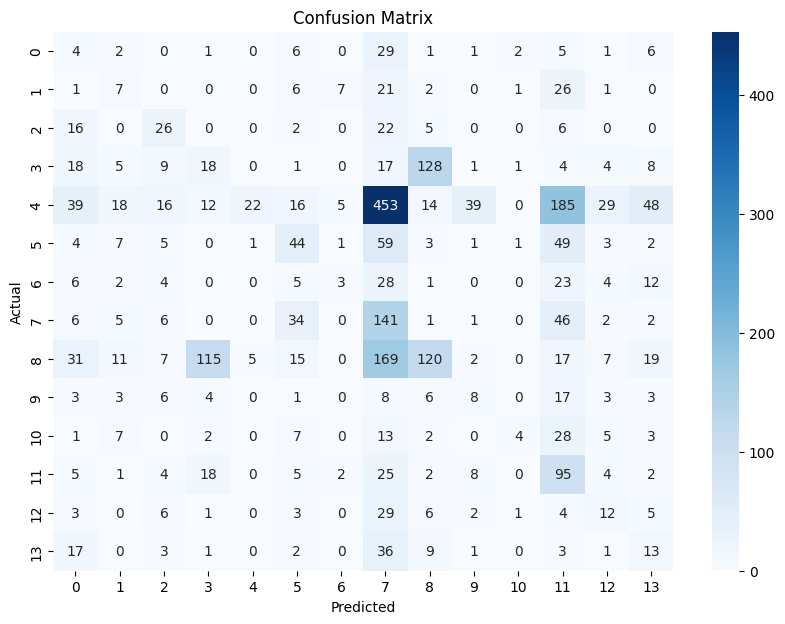

In [6]:
test=pd.read_csv("Processed_wild.csv")
if 'Unnamed: 0' in test.columns:
    test = test.drop('Unnamed: 0', axis=1)
test=test.drop('action',axis=1)
test = test[~test['app'].isin([14, 15, 16])]
x_test=test.drop('app',axis=1)
Y_test=test['app']
x_test_scaled=scaler.fit_transform(x_test)
y_test_pred = rf_model.predict(x_test_scaled)

accuracy_test = accuracy_score(Y_test, y_test_pred)
report_test = classification_report(Y_test, y_test_pred)

print(f"Accuracy: {accuracy_test}")
print("Classification Report:")
print(report_test)

# Confusion Matrix
cm1 = confusion_matrix(Y_test, y_test_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [8]:
#Hypertune random forest using Processed_random
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter

# Load the dataset
data = pd.read_csv('Processed_random.csv')

if 'Unnamed: 0' in data.columns:
    data = data.drop('Unnamed: 0', axis=1)

data = data.drop('action',axis=1)
# Separate features and target
X = data.drop(columns=['app'])
y = data['app']

#  Hyperparameter Tuning with GridSearchCV for Random Forest
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for RandomForest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model after tuning
best_rf_model = grid_search.best_estimator_

# Step 3: Evaluate the model performance on the test set
y_pred = best_rf_model.predict(X_test_scaled)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"\nOptimized Model Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

y_pred_proba = best_rf_model.predict_proba(X_test)




Optimized Model Accuracy: 75.37%

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        93
           1       0.64      0.63      0.64        90
           2       0.66      0.61      0.64        90
           3       0.69      0.52      0.59        42
           4       0.79      0.80      0.79       202
           5       0.55      0.55      0.55        64
           6       0.53      0.39      0.45        80
           7       0.69      0.68      0.68        81
           8       0.83      0.86      0.85       418
           9       0.63      0.70      0.66       108
          10       0.76      0.79      0.78       198
          11       0.76      0.76      0.76       164
          12       0.79      0.79      0.79       273
          13       0.80      0.82      0.81       107

    accuracy                           0.75      2010
   macro avg       0.71      0.70      0.70      2010
weighted avg       0.7

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


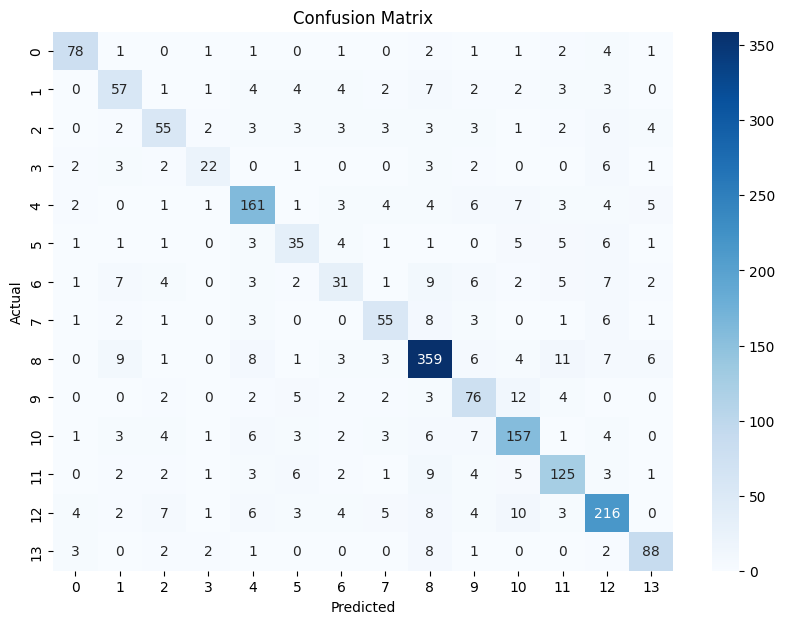

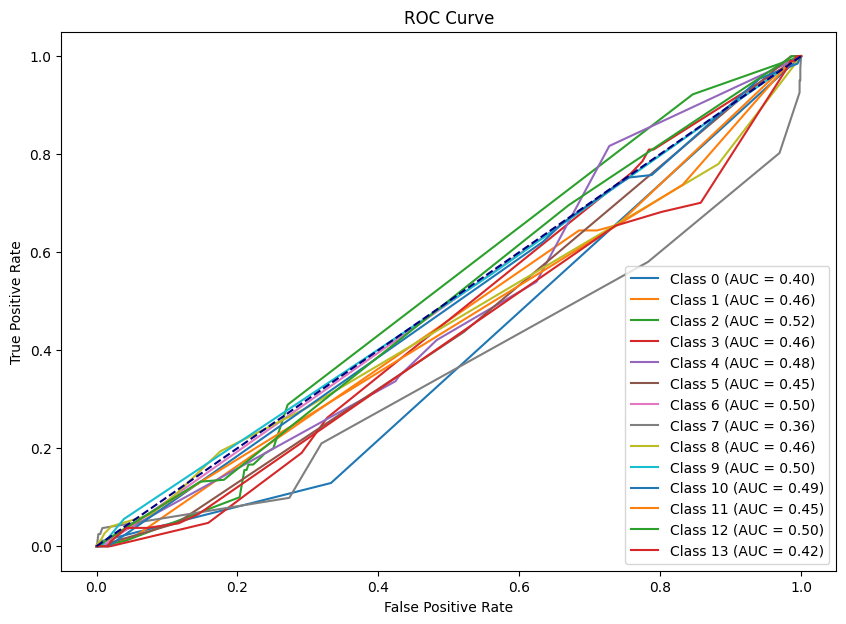

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_rf_model.classes_, yticklabels=best_rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve (only for binary classification or using One-vs-Rest for multi-class)
plt.figure(figsize=(10, 7))
for i, class_label in enumerate(best_rf_model.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [10]:
# Get the best hyperparameters from the GridSearchCV
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}



Optimized Model Accuracy: 99.33%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       418
           1       1.00      1.00      1.00       426
           2       1.00      1.00      1.00       389
           3       1.00      1.00      1.00       432
           4       0.98      0.99      0.99       394
           5       0.99      0.98      0.99       404
           6       0.99      1.00      0.99       407
           7       0.99      1.00      0.99       412
           8       1.00      0.99      0.99       415
           9       0.99      0.99      0.99       384
          10       0.99      0.98      0.98       376
          11       0.99      1.00      0.99       423
          12       1.00      1.00      1.00       415
          13       0.99      1.00      1.00       387

    accuracy                           0.99      5682
   macro avg       0.99      0.99      0.99      5682
weighted avg       0.9

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


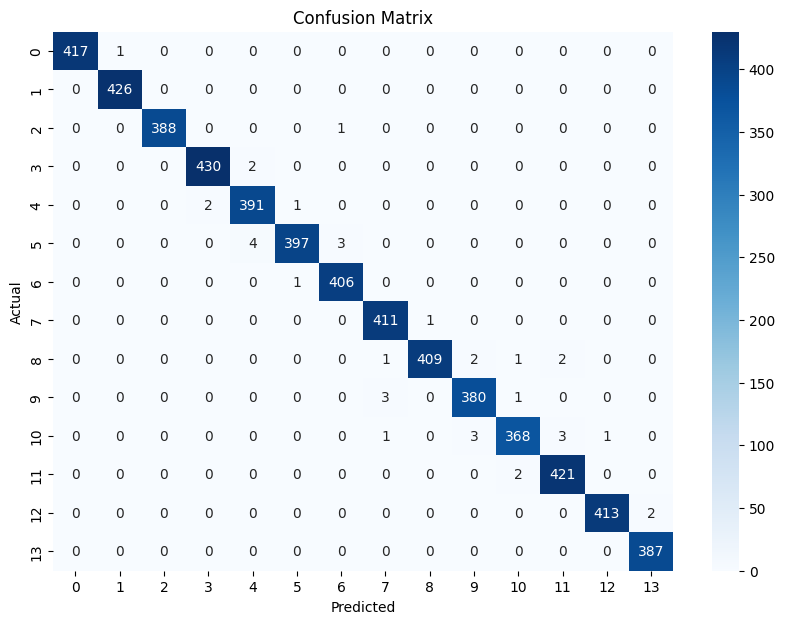

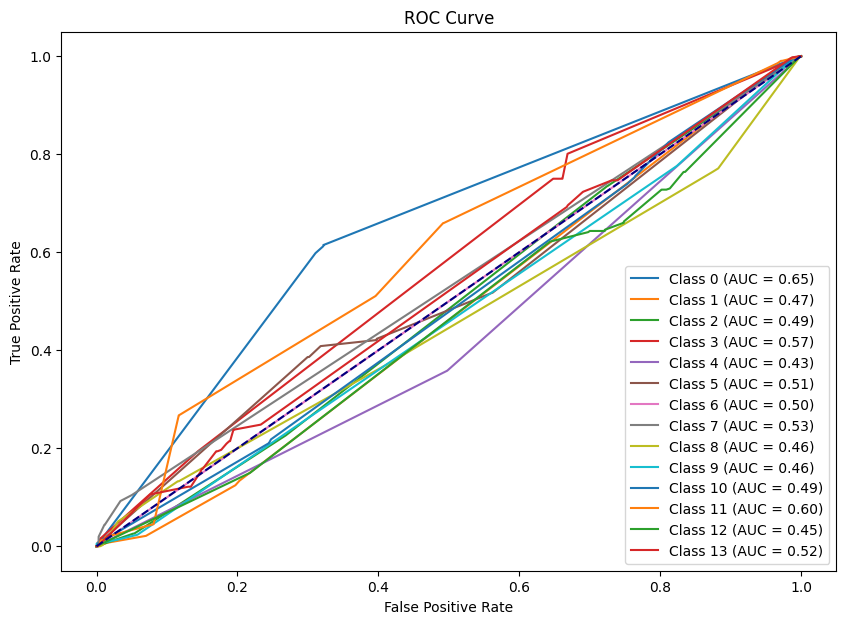

In [7]:
#Hypertune random forest using balanced_random_smote
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter

# Load the dataset
data = pd.read_csv('balanced_random_smote.csv')

data = data.drop('action',axis=1)
# Separate features and target
X = data.drop(columns=['app'])
y = data['app']

#  Hyperparameter Tuning with GridSearchCV for Random Forest
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for RandomForest
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# Create the Random Forest model
best_rf_model = RandomForestClassifier(random_state=42, max_depth= None, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 200)

# Use GridSearchCV for hyperparameter tuning
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
best_rf_model.fit(X_train_scaled, y_train)

# Get the best model after tuning
# best_rf_model = grid_search.best_estimator_

# Step 3: Evaluate the model performance on the test set
y_pred = best_rf_model.predict(X_test_scaled)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"\nOptimized Model Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

y_pred_proba = best_rf_model.predict_proba(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_rf_model.classes_, yticklabels=best_rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve (only for binary classification or using One-vs-Rest for multi-class)
plt.figure(figsize=(10, 7))
for i, class_label in enumerate(best_rf_model.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


Optimized Model Accuracy: 97.87%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        64
           1       1.00      0.81      0.90        16
           2       0.90      0.93      0.91        28
           3       0.89      1.00      0.94        41
           4       0.96      0.99      0.98       140
           5       1.00      0.69      0.82        13
           6       1.00      1.00      1.00        12
           7       0.97      0.90      0.93        31
           8       0.98      1.00      0.99       300
           9       1.00      0.84      0.91        43
          10       0.99      1.00      1.00       120
          11       0.99      1.00      0.99        81
          12       1.00      1.00      1.00       187
          13       1.00      1.00      1.00        52

    accuracy                           0.98      1128
   macro avg       0.98      0.94      0.95      1128
weighted avg       0.9

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


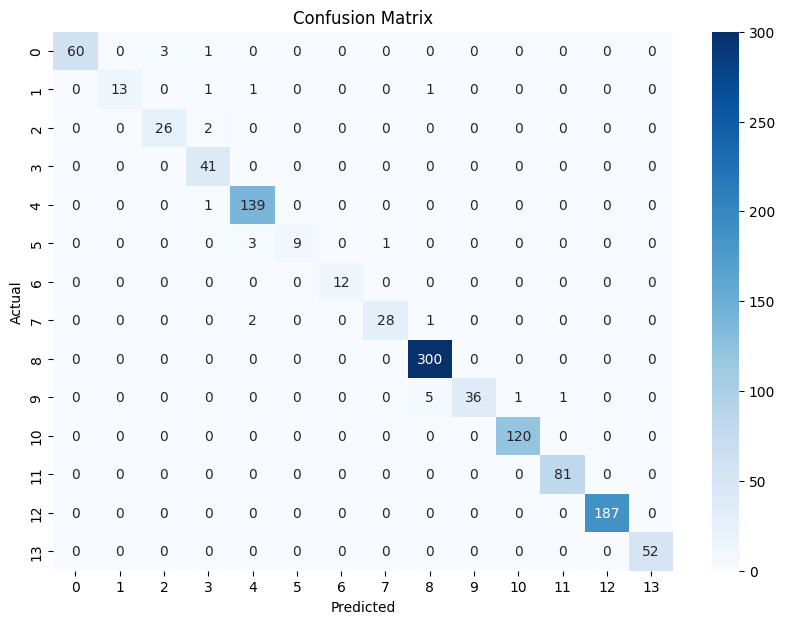

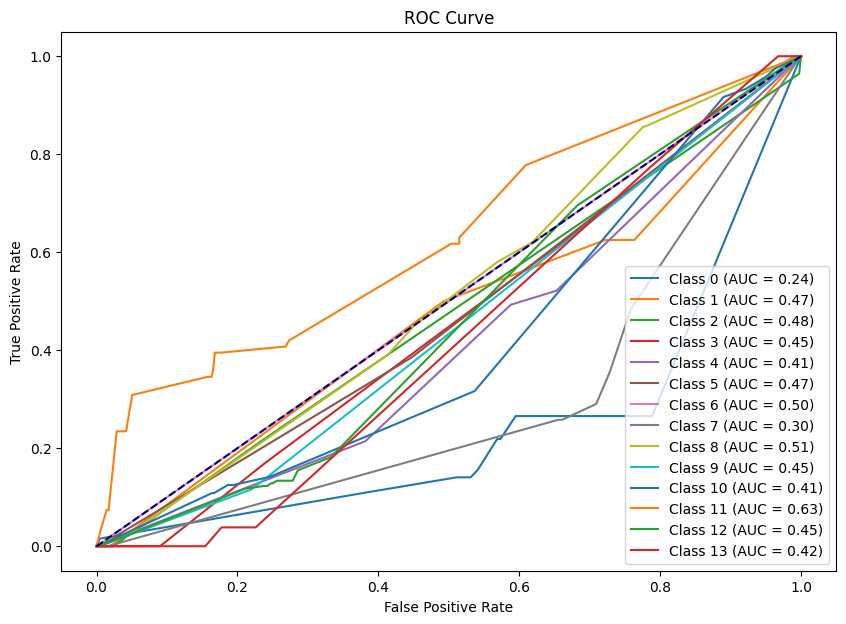

In [8]:
#Hypertune random forest using balanced_random_enn
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter

# Load the dataset
data = pd.read_csv('balanced_random_enn.csv')

data = data.drop('action',axis=1)
# Separate features and target
X = data.drop(columns=['app'])
y = data['app']

#  Hyperparameter Tuning with GridSearchCV for Random Forest
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for RandomForest
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# Create the Random Forest model
best_rf_model = RandomForestClassifier(random_state=42, max_depth= None, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 200)

# Use GridSearchCV for hyperparameter tuning
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
best_rf_model.fit(X_train_scaled, y_train)

# Get the best model after tuning
# best_rf_model = grid_search.best_estimator_

# Step 3: Evaluate the model performance on the test set
y_pred = best_rf_model.predict(X_test_scaled)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"\nOptimized Model Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

y_pred_proba = best_rf_model.predict_proba(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_rf_model.classes_, yticklabels=best_rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve (only for binary classification or using One-vs-Rest for multi-class)
plt.figure(figsize=(10, 7))
for i, class_label in enumerate(best_rf_model.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


Optimized Model Accuracy: 99.14%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       326
           1       0.99      0.99      0.99       285
           2       0.99      0.99      0.99       350
           3       0.99      1.00      0.99       328
           4       0.99      0.98      0.98       301
           5       0.98      0.99      0.98       328
           6       0.98      0.99      0.98       313
           7       0.99      0.97      0.98       324
           8       0.99      0.98      0.99       317
           9       0.99      0.99      0.99       336
          10       1.00      1.00      1.00       284
          11       1.00      1.00      1.00       344
          12       1.00      1.00      1.00       329
          13       0.99      1.00      1.00       348

    accuracy                           0.99      4513
   macro avg       0.99      0.99      0.99      4513
weighted avg       0.9

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


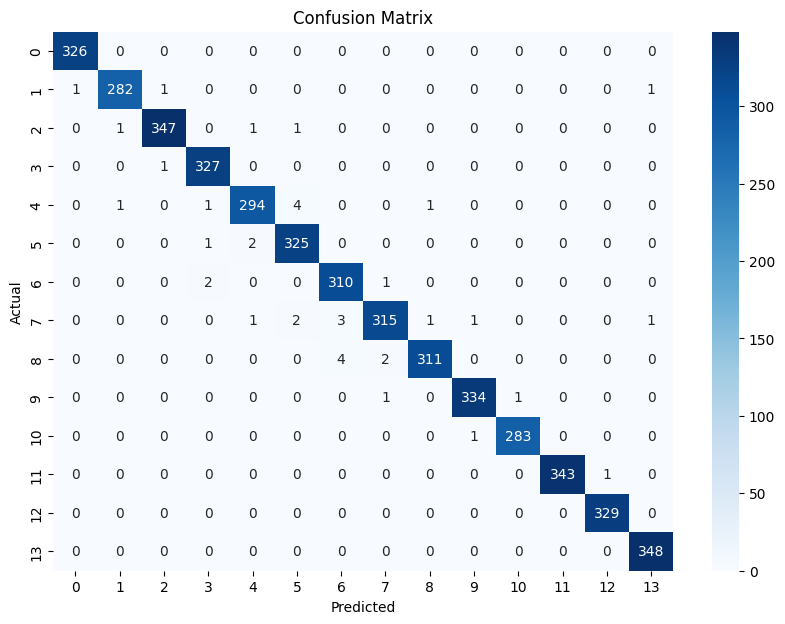

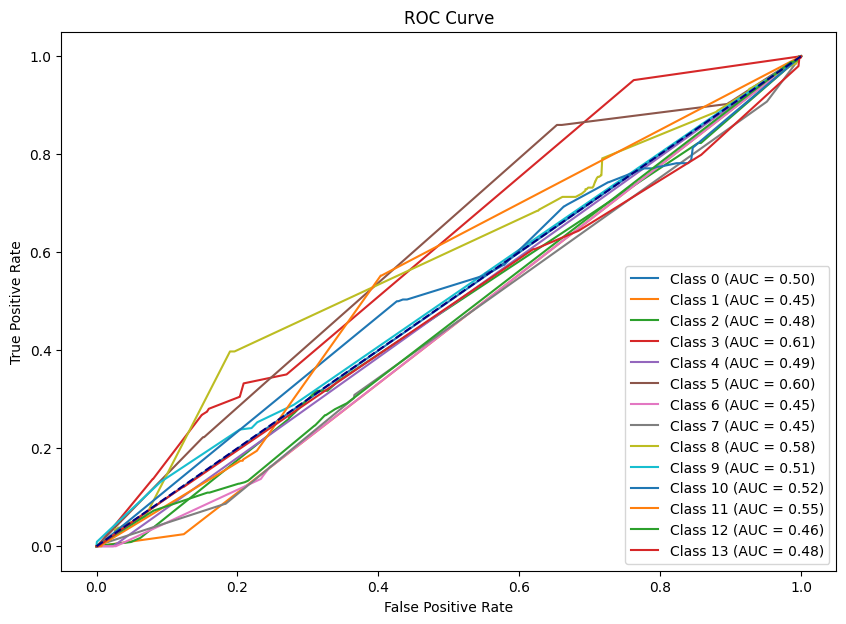

In [9]:
#Hypertune random forest using balanced_random_smoteenn
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter

# Load the dataset
data = pd.read_csv('balanced_random_smoteenn.csv')

data = data.drop('action',axis=1)
# Separate features and target
X = data.drop(columns=['app'])
y = data['app']

#  Hyperparameter Tuning with GridSearchCV for Random Forest
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for RandomForest
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# Create the Random Forest model
best_rf_model = RandomForestClassifier(random_state=42, max_depth= None, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 200)

# Use GridSearchCV for hyperparameter tuning
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
best_rf_model.fit(X_train_scaled, y_train)

# Get the best model after tuning
# best_rf_model = grid_search.best_estimator_

# Step 3: Evaluate the model performance on the test set
y_pred = best_rf_model.predict(X_test_scaled)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"\nOptimized Model Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

y_pred_proba = best_rf_model.predict_proba(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_rf_model.classes_, yticklabels=best_rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve (only for binary classification or using One-vs-Rest for multi-class)
plt.figure(figsize=(10, 7))
for i, class_label in enumerate(best_rf_model.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [12]:
#Hypertune random forest using balanced_random_smoteenn
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter

# Load the dataset
data = pd.read_csv('balanced_random_smoteenn.csv')

if 'Unnamed: 0' in data.columns:
    data = data.drop('Unnamed: 0', axis=1)

data = data.drop('action',axis=1)
# Separate features and target
X = data.drop(columns=['app'])
y = data['app']

#  Hyperparameter Tuning with GridSearchCV for Random Forest
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for RandomForest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model after tuning
best_rf_model = grid_search.best_estimator_

# Step 3: Evaluate the model performance on the test set
y_pred = best_rf_model.predict(X_test_scaled)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"\nOptimized Model Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

y_pred_proba = best_rf_model.predict_proba(X_test)

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_rf_model.classes_, yticklabels=best_rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve (only for binary classification or using One-vs-Rest for multi-class)
plt.figure(figsize=(10, 7))
for i, class_label in enumerate(best_rf_model.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

KeyboardInterrupt: 

In [11]:
 # Get the best hyperparameters from the GridSearchCV
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [12]:
#testing model
import pandas as pd

# Load the uploaded file
file_path = 'Processed_random.csv'
data = pd.read_csv(file_path)

# Sample 30 rows from the data
sample_data = data.sample(n=30, random_state=1)

# Save the sampled data to a new CSV file
output_path = 'test_set.csv'
sample_data.to_csv(output_path, index=False)

output_path

'test_set.csv'